## DATA SCIENCE AND VISUALIZATION

### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib import gridspec
import seaborn as sns
import folium
import geopandas as gpd

%config Completer.use_jedi = False

In [2]:
_PATH = './'
_book_file = 'Reviews_book.csv'
_mask_file = 'leaf1.png'
_life_file = 'Life_expectancy_dataset.csv'

_bookPath = os.path.join(_PATH, _book_file)
_maskPath = os.path.join(_PATH, _mask_file)
_lifePath = os.path.join(_PATH, _life_file)

### Numpy array

In [3]:
# Prime number check function
def is_prime(n):
  """@brief Check if a number is prime
  @note
  - Time complexity: O(sqrt(n))
  - Space complexity: O(1)

  Parameters
  ----------
  n : int
      integer to check

  Returns
  -------
  bool
      true if n is prime, false otherwise
  """
  if n == 1:
    return False
  for i in range(2, int(np.sqrt(n))+1):
    if n % i == 0:
      return False
  return True

In [4]:
# Test is_prime function
def test_is_prime():
  """@brief
  """

  # Test cases
  test_cases = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  test_results = [False, True, True, False, True, False, True, False, False, False]

  # Run test cases
  for i, test_case in enumerate(test_cases):
    assert is_prime(test_case) == test_results[i]

  print('test_is_prime() passed')

In [5]:
# Generate a 4x4 array with elements randomly generated from 1 to 100
np.random.seed(4)
arr = np.random.randint(1,101,size=(4,4))
arr

array([[47, 56, 70,  2],
       [88, 73, 51, 10],
       [59, 95, 56, 56],
       [58, 37, 51, 45]])

In [6]:
# Check and replace prime numbers in the array with the value of the most common element in the array
m = stats.mode(arr.ravel())
print('Phần tử xuất hiện nhiều nhất trong mảng là :',m[0][0])
for x in range (arr.shape[0]):
    for y in range (arr.shape[1]):
        if is_prime(arr[x][y]):
            arr[x][y] = m[0][0]
arr

Phần tử xuất hiện nhiều nhất trong mảng là : 56


/tmp/ipykernel_93957/4289512352.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m = stats.mode(arr.ravel())


array([[56, 56, 70, 56],
       [88, 56, 51, 10],
       [56, 95, 56, 56],
       [58, 56, 51, 45]])

### Reviews book

#### Standardize the content and generate word cloud

In [7]:
# Reviews_book.csv is a dataset of book reviews. Read the data and create a text paragraph from the ReviewContent column.
# Then standardize the text by removing additional words deemed meaningless: 'sea', 'girl', 'end', 'one', 'movie', 'reading', 
# 'keep', 'put', 'end', 'time', 'author', 'wait', 'kept', 'book', 'character', 'story', 'rachel', 'twist', 'still', 
# 'chapter', 'story', 'book', 'character', 'author', 'reading', 'gone', 'got', 'thing'

df = pd.read_csv(_bookPath, encoding ="latin-1") 
print(df.head())
# Remove STOPWORD
stopwords = set(STOPWORDS) 
wc = WordCloud(
                background_color='white',
                stopwords=stopwords
)
comment_words =' '.join(df['ReviewContent'])
# meaningless words
del_wrd_lst=[ 'sea', 'girl', 'end', 'one', 'movie', 'reading', 'keep', 'put', 'end',
             'time', 'author', 'wait', 'kept', 'book', 'character', 'story', 'rachel',
             'twist', 'still', 'chapter', 'story', 'book', 'character', 'author', 'reading',
             'gone', 'got', 'thing']
for word in del_wrd_lst:
    stopwords.add(word)

# regenerate the word cloud
wc.generate(comment_words)

                                       ReviewContent
0  Good. It IS a page turner. You can read this b...
1  There are no words for how much I loathed this...
2  I think I would ordinarily cut this book more ...
3  Three disjointed characters for whom it's hard...
4  Was snookered into this novel as it was compar...


#### Wordcloud visualization

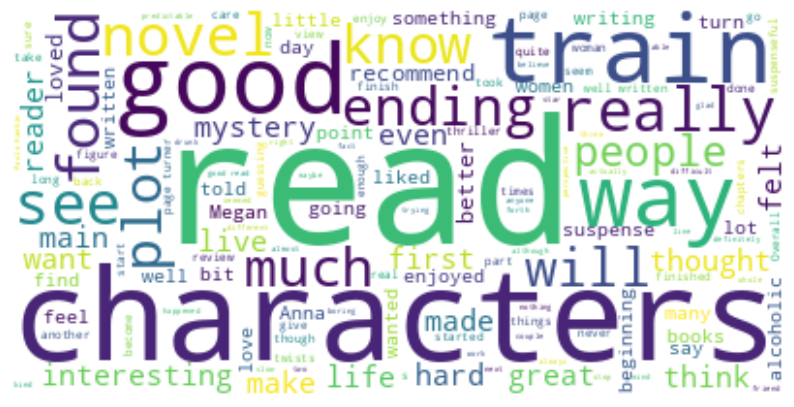

In [8]:
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

####  Wordcloud with mask

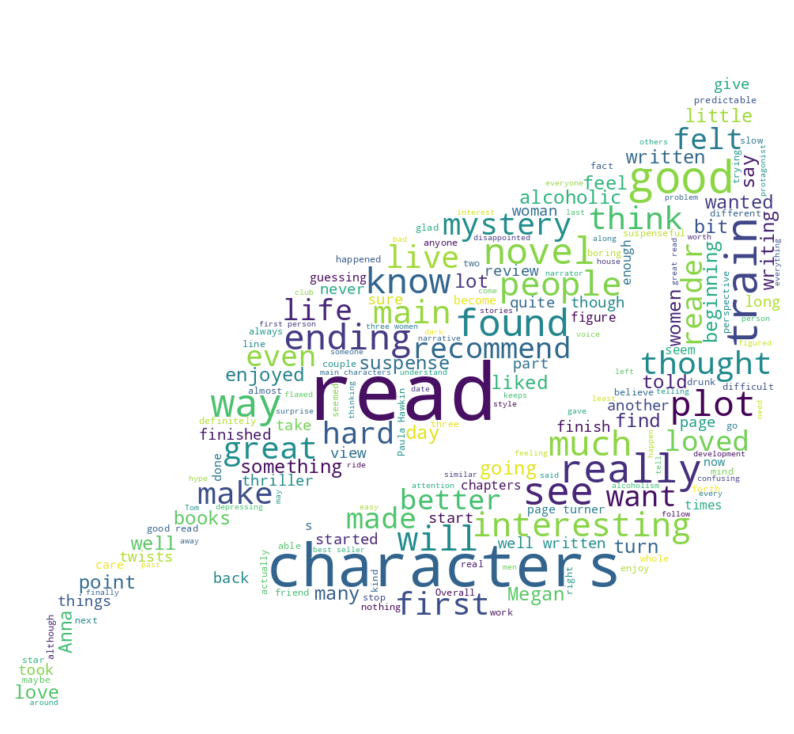

In [9]:
# Select image for wc_mask
wc_mask = np.array(Image.open(_maskPath))
# wordclouds with wc_mask
wc1 = WordCloud(background_color='white', 
                mask=wc_mask, stopwords=stopwords)
wc1.generate(comment_words)

plt.figure(figsize=(10, 12))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

### Life expectancy

#### Read data

In [10]:
# Life_expectancy_dataset.csv is a dataset of life expectancy in different countries.
life_exp = pd.read_csv(_lifePath,encoding='ISO-8859-1')
print(life_exp.head())
print(life_exp.tail())
print(life_exp.info())
print(life_exp.describe())

   Rank       Country  Overall Life  Male Life  Female Life Continent
0     1        Monaco          89.5       85.6         93.5    Europe
1     2         Japan          85.0       81.7         88.5      Asia
2     3     Singapore          85.0       82.3         87.8      Asia
3     4  Macau; China          84.5       81.6         87.6      Asia
4     5    San Marino          83.3       80.7         86.1    Europe
     Rank        Country  Overall Life  Male Life  Female Life Continent
218   219          Gabon          52.1       51.6         52.5    Africa
219   220      Swaziland          51.6       52.2         51.0    Africa
220   221    Afghanistan          51.3       49.9         52.7      Asia
221   222  Guinea-Bissau          50.6       48.6         52.7    Africa
222   223           Chad          50.2       49.0         51.3    Africa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dty

#### Check missing values

In [11]:
isLifeNull=life_exp.isna().any()
isLifeNull

Rank            False
Country         False
Overall Life    False
Male Life        True
Female Life      True
Continent       False
dtype: bool

In [12]:
# Replace nan value with mean value of "Male Life" column
mean_val = life_exp["Male Life"].mean()
life_exp["Male Life"].fillna(mean_val, inplace=True)
mean_val = life_exp["Female Life"].mean()
life_exp["Female Life"].fillna(mean_val, inplace=True)
# Check nan again
isLifeNull=life_exp.isna().any()
isLifeNull

Rank            False
Country         False
Overall Life    False
Male Life       False
Female Life     False
Continent       False
dtype: bool

#### Distribution of life expectancy by gender

<Figure size 1000x600 with 0 Axes>

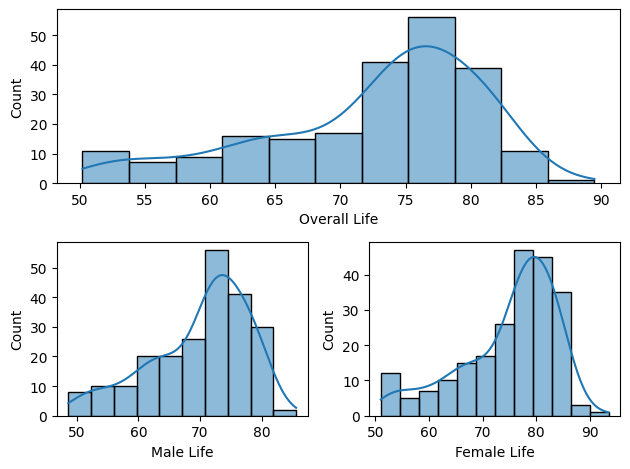

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 6))
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,:])
sns.histplot(life_exp['Overall Life'], kde=True)

ax1 = fig.add_subplot(gs[1,0])
sns.histplot(life_exp['Male Life'], kde=True)

ax2 = fig.add_subplot(gs[1,1])
sns.histplot(life_exp['Female Life'], kde=True)

plt.show()
plt.clf()

#### Top 10 countries with the highest life expectancy

0              Monaco
2           Singapore
1               Japan
3        Macau; China
4          San Marino
5             Iceland
6    Hong Kong, China
7             Andorra
8         Switzerland
9            Guernsey
Name: Country, dtype: object


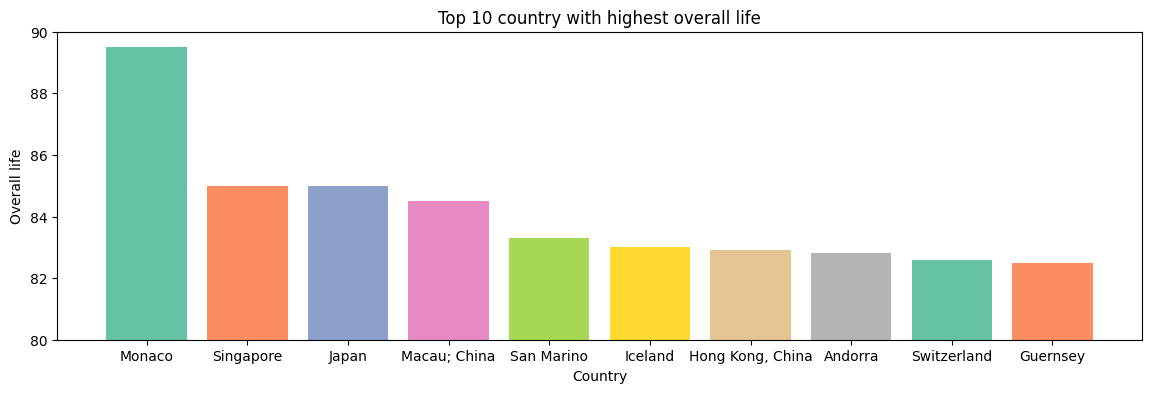

<Figure size 640x480 with 0 Axes>

In [14]:
top10Life = life_exp.sort_values(by='Overall Life', ascending=False, inplace=False).head(10)
print(top10Life.Country)
# barplot
plt.figure(figsize=(14, 4))
plt.title('Top 10 country with highest overall life')
plt.ylabel('Overall life')
plt.xlabel('Country')
plt.ylim(80,90)
plt.bar(top10Life['Country'],top10Life['Overall Life'], align='center', color=sns.color_palette('Set2'))
plt.show()
plt.clf()

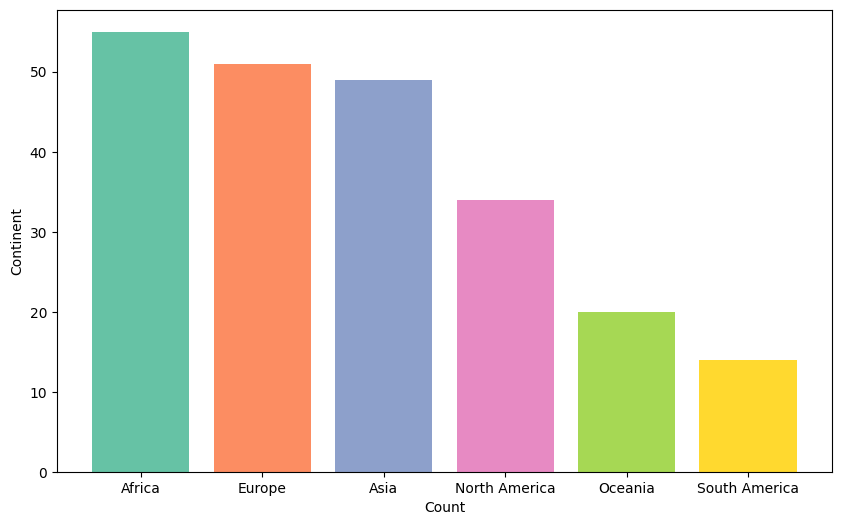

<Figure size 640x480 with 0 Axes>

In [15]:
# Vẽ biểu đồ cho biết số quốc gia trong mỗi châu lục 
country_count=life_exp.Continent.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(country_count.index, country_count.values, align='center', color=sns.color_palette('Set2'))
plt.ylabel('Continent')
plt.xlabel('Count')
plt.show()
plt.clf()

Standard deviation:
               Overall Life
Continent                  
Africa             7.643298
Asia               6.181244
Europe             3.619835
North America      4.012504
Oceania            4.690876
South America      3.194879


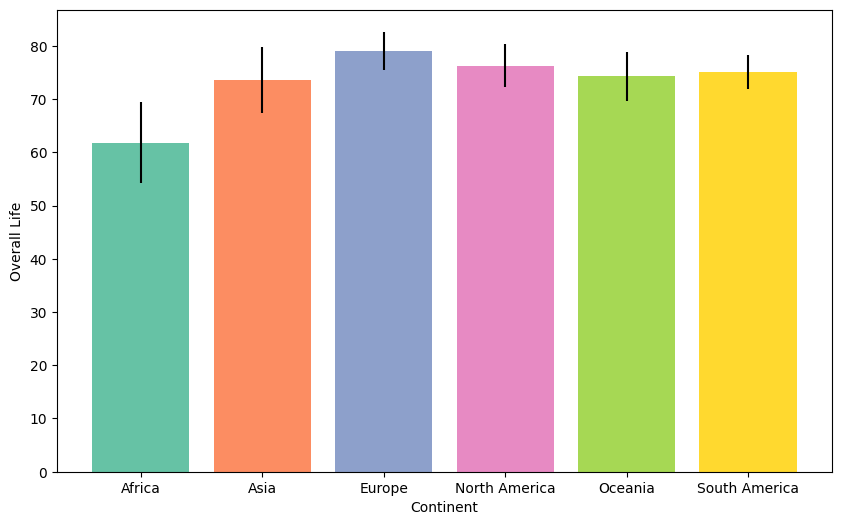

<Figure size 640x480 with 0 Axes>

In [16]:
# Vẽ biểu đồ thể hiện tỉ lệ tuổi thọ trung bình của mỗi châu lục
contMean = life_exp[['Continent', 'Overall Life']].groupby('Continent', as_index = False).mean()
std_err = life_exp[['Continent', 'Overall Life']].groupby('Continent').std()
print(f"Standard deviation:\n{std_err}")
plt.figure(figsize=(10, 6))
# Add the standard error to the plot
# sns.barplot(x='Continent', y='Overall Life', data=contMean, hue='Continent', errorbar=('ci', 90))
plt.bar(contMean['Continent'], contMean['Overall Life'], align='center', color=sns.color_palette('Set2'), yerr=std_err['Overall Life'])
plt.ylabel('Overall Life')
plt.xlabel('Continent')
plt.show()
plt.clf()

<Figure size 1000x600 with 0 Axes>

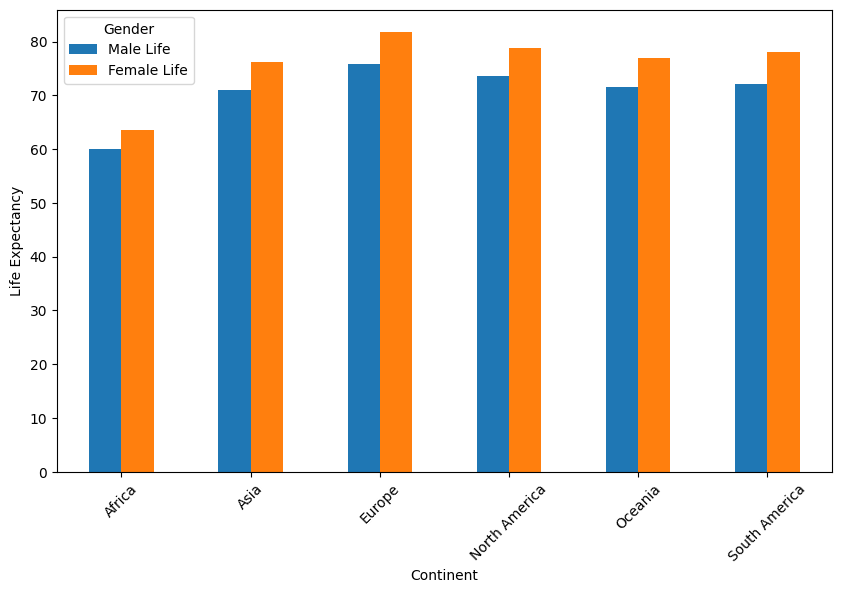

<Figure size 640x480 with 0 Axes>

In [17]:
# Vẽ biểu đồ so sánh tuổi thọ trung bình của nam và nữ ở mỗi châu lục. Bạn có nhận xét gì về biểu đồ này.
contMean = life_exp[['Continent', 'Female Life', 'Male Life']].groupby('Continent', as_index = False).mean()
plt.figure(figsize=(10, 6))
ax = contMean[['Male Life', 'Female Life']].plot(kind='bar', figsize=(10, 6))
ax.set_xticklabels(contMean['Continent'])
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.legend(title='Gender')
plt.show()
plt.clf()

- **Comment: women's life expectancy is higher than men's in all continents.**

#### Overrall Life in each continent

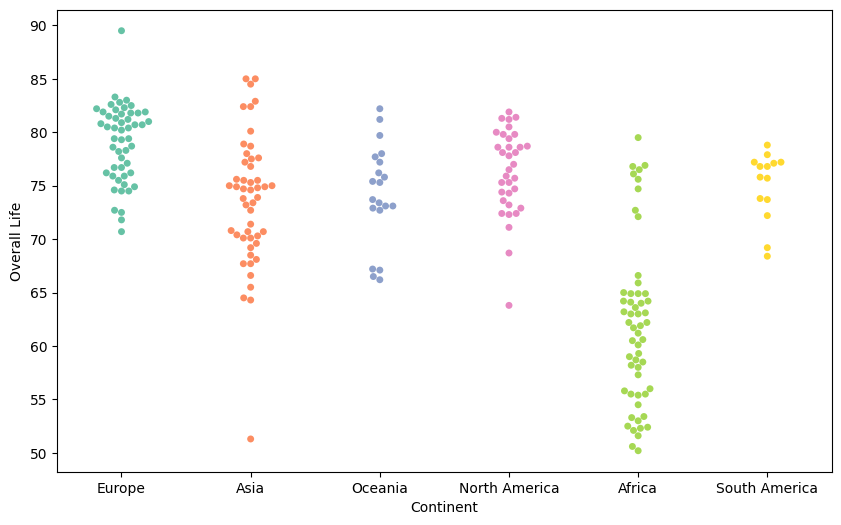

In [18]:
plt.figure(figsize=(10, 6))
# sns.stripplot(x='Continent', y='Overall Life', data=life_exp, hue='Continent', palette='Set2', jitter=True)
sns.swarmplot(x='Continent', y='Overall Life', data=life_exp, hue='Continent', palette='Set2')
plt.show()

- **Comment: life expectancy in Africa is the lowest compared to other continents.**

#### Box plot of life expectancy

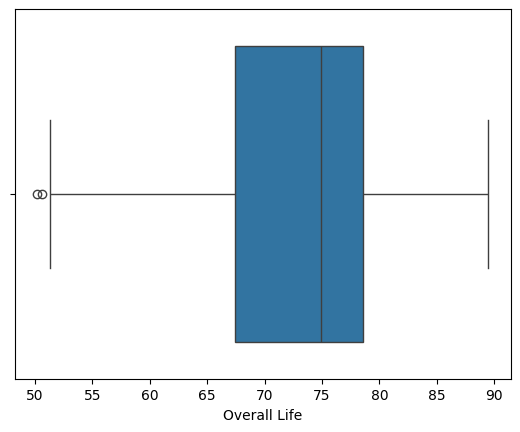

In [19]:
sns.boxplot(x='Overall Life', data=life_exp, orient='h')
plt.show()

=> There are some outliers in the data.

##### Remove outliers

Q1: 67.45, Q3: 78.6, IQR: 11.15
Lower bound: 51.0, upper bound: 95.0


<Axes: xlabel='Overall Life'>

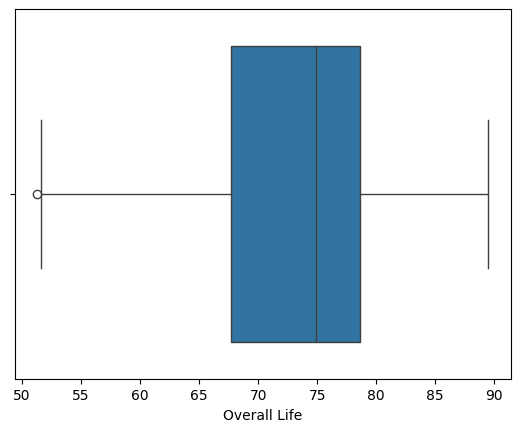

In [20]:
# Calculate quantiles
Q1, Q3 = life_exp['Overall Life'].quantile([0.25, 0.75]).values
IQR = round(Q3 - Q1, 2)
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
# Define the upper and lower bounds to filter outliers
lower_bound = round(Q1 - 1.5 * IQR, 0)
upper_bound = round(Q3 + 1.5 * IQR, 0)
print(f"Lower bound: {lower_bound}, upper bound: {upper_bound}")
# Remove outliers of 'Overall Life'
life_exp_no_outliers = life_exp[(life_exp['Overall Life'] > lower_bound) & (life_exp['Overall Life'] < upper_bound)]
# Plot the box plot of life expectancy
sns.boxplot(x='Overall Life', data=life_exp_no_outliers, orient='h')


### Geospatial visualization

##### Read data

In [21]:
df = pd.read_csv(r'./World_Power_Consumption.csv', index_col=0)
# To make sure the data is sorted by the index
df.reset_index(drop=True, inplace=True)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

                         Text
0     China 5,523,000,000,000
1    United 3,832,000,000,000
2  European 2,771,000,000,000
3    Russia 1,065,000,000,000
4       Japan 921,000,000,000
                Text
214  Saint 7,440,000
215   Niue 2,790,000
216     Gaza 202,000
217    Malta 174,700
218  Northern 48,300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    219 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB
None
                           Text
count                       219
unique                      219
top     China 5,523,000,000,000
freq                          1


#### Data preprocessing

In [22]:
# Create a new dataframe with 2 columns: Country and Power_Consumption
df_split = df['Text'].apply(lambda x: x.split(' '))
df_new = pd.DataFrame()
df_new['Country'] = df_split.apply(lambda x: x[0])
df_new['Power_Consumption'] = df_split.apply(lambda x: x[1])
df_new

,Country,Power_Consumption
0,China,"5,523,000,000,000"
1,United,"3,832,000,000,000"
2,European,"2,771,000,000,000"
3,Russia,"1,065,000,000,000"
4,Japan,"921,000,000,000"
...,...,...
214,Saint,"7,440,000"
215,Niue,"2,790,000"
216,Gaza,"202,000"
217,Malta,"174,700"


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            219 non-null    object
 1   Power_Consumption  219 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [24]:
# Convert Power_Consumption to numeric
df_new['Power_Consumption'] = pd.to_numeric(df_new['Power_Consumption'].str.replace(',', ''))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            219 non-null    object
 1   Power_Consumption  219 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [25]:
df_new

,Country,Power_Consumption
0,China,5523000000000
1,United,3832000000000
2,European,2771000000000
3,Russia,1065000000000
4,Japan,921000000000
...,...,...
214,Saint,7440000
215,Niue,2790000
216,Gaza,202000
217,Malta,174700


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            219 non-null    object
 1   Power_Consumption  219 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


#### Geolocation

In [27]:
# Create a map with cartodbpositron tiles, center=[0, 0], and zoom level=3
LOC_COORDINATES = (0, 0)
loc_map = folium.Map(tiles='cartodbpositron', location=LOC_COORDINATES, zoom_start=3, control_scale=True)
loc_map

#### Choropleth map

In [28]:
# Create choropleth map of Power_Consumption by country
world_geo = r'world-countries.json'
choropleth_map = folium.Choropleth(
    geo_data=world_geo,
    data=df_new,
    columns=['Country', 'Power_Consumption'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Power Consumption (kWh/year)',
    highlight=True
).add_to(loc_map)

loc_map